# Caravan

## KNN

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
data = pd.read_csv('https://raw.githubusercontent.com/yashre-bh/ISL-Python-datasets/main/Caravan.csv')
data.head()

,Unnamed: 0,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,1,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,2,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,3,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,4,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,5,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0


In [18]:
data.shape


(5822, 87)

In [19]:
data.isnull().sum()

Unnamed: 0    0
MOSTYPE       0
MAANTHUI      0
MGEMOMV       0
MGEMLEEF      0
             ..
APLEZIER      0
AFIETS        0
AINBOED       0
ABYSTAND      0
Purchase      0
Length: 87, dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 87 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  5822 non-null   int64
 1   MOSTYPE     5822 non-null   int64
 2   MAANTHUI    5822 non-null   int64
 3   MGEMOMV     5822 non-null   int64
 4   MGEMLEEF    5822 non-null   int64
 5   MOSHOOFD    5822 non-null   int64
 6   MGODRK      5822 non-null   int64
 7   MGODPR      5822 non-null   int64
 8   MGODOV      5822 non-null   int64
 9   MGODGE      5822 non-null   int64
 10  MRELGE      5822 non-null   int64
 11  MRELSA      5822 non-null   int64
 12  MRELOV      5822 non-null   int64
 13  MFALLEEN    5822 non-null   int64
 14  MFGEKIND    5822 non-null   int64
 15  MFWEKIND    5822 non-null   int64
 16  MOPLHOOG    5822 non-null   int64
 17  MOPLMIDD    5822 non-null   int64
 18  MOPLLAAG    5822 non-null   int64
 19  MBERHOOG    5822 non-null   int64
 20  MBERZELF    5822 non-null   in

In [48]:
X=data.iloc[:, 1:-1].values
X
X1=X

In [49]:
y = data.iloc[:, -1].values
y

array([0, 0, 0, ..., 1, 0, 0])

In [50]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X)

StandardScaler()

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [63]:
knn = KNeighborsClassifier(n_neighbors=1)
#knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("Predictions: \n", knn.predict(X_test))
print("Actual values: \n", y_test )
print("Accuracy Score: ", knn.score(X_test, y_test))

Predictions: 
 [0 0 0 ... 0 0 0]
Actual values: 
 [0 0 0 ... 1 0 0]
Accuracy Score:  0.8824034334763948


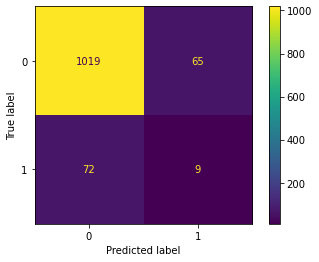

In [53]:
from sklearn.metrics import (confusion_matrix, plot_confusion_matrix)
plot_confusion_matrix(knn, X_test, y_test)  
plt.show()

## Logistical Regression:

In [54]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [55]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.2, random_state=42)


In [57]:
lor = LogisticRegression()

In [58]:
lor.fit(X_train, y_train)

/Users/shreya/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
y_cap=lor.predict(X_test)
print(lor.score(X_test, y_test))

0.9296137339055794


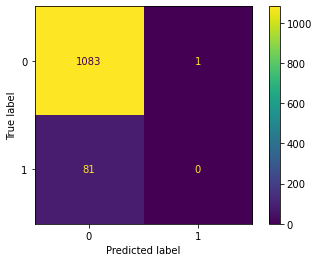

In [60]:
plot_confusion_matrix( lor, X_test, y_test)  
plt.show()